# Univariate Gaussian Parameter Estimation

Testing out capabilities of [Edward](http://edwardlib.org/) using a simple Gaussian model. The data are given by $x\sim\mathcal{N}(\mu,\sigma^2)$. We want to find out $\mu$ and $\sigma^2$.

In [4]:
import edward as ed
from edward.models import Normal,PointMass
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('ggplot')

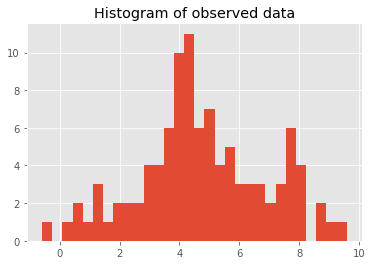

In [42]:
mu_true = 5
sd_true = 2
N = 100
xtrain = np.random.normal(mu_true,sd_true,size=N)
plt.title("Histogram of observed data")
plt.hist(xtrain, 30)
plt.show()

In [43]:
print("mean= ",xtrain.mean())
print("SD= ", xtrain.std())

mean=  4.74461219575
SD=  2.11484550658


## Maximum Likelihood

In [56]:
#edward model
s = tf.Variable(1.0)
m = tf.Variable(0.0)
#m = Normal(0.0, 100.0)
x = Normal(mu=m*tf.ones(N),sigma=s*tf.ones(N))
#qm = PointMass(params=tf.Variable(0.0))
#mle = ed.MAP({m:qm},{x:xtrain})
#mle = ed.MAP([m],{x:xtrain})
mle = ed.MAP({},{x:xtrain})
mle.run()
print("Point estimate of mu using ML: ", m.eval())
print("Point estimate of sigma using ML: ", s.eval())

Iteration    1 [  0%]: Loss = 1441.090
Iteration  100 [ 10%]: Loss = 229.350
Iteration  200 [ 20%]: Loss = 218.691
Iteration  300 [ 30%]: Loss = 216.915
Iteration  400 [ 40%]: Loss = 216.794
Iteration  500 [ 50%]: Loss = 216.792
Iteration  600 [ 60%]: Loss = 216.792
Iteration  700 [ 70%]: Loss = 216.792
Iteration  800 [ 80%]: Loss = 216.792
Iteration  900 [ 90%]: Loss = 216.792
Iteration 1000 [100%]: Loss = 216.792
Point estimate of mu using ML:  4.74461
Point estimate of sigma using ML:  2.11485


We see that the MLEs from Edward agree with those computed by hand.

## Maximum a Posteriori (MAP)

In [61]:
#edward model
s = tf.Variable(1.0)
m = Normal(0.0, 10.0) #weak prior for m
x = Normal(mu=m*tf.ones(N),sigma=s*tf.ones(N))
qm = PointMass(params=tf.Variable(0.0))
res = ed.MAP({m:qm},{x:xtrain})
res.run()
#sess = ed.get_session()
print("Point estimate of mu using MAP: ", qm.eval())
print("Point estimate of sigma using ML: ", s.eval())

Iteration    1 [  0%]: Loss = 1444.311
Iteration  100 [ 10%]: Loss = 232.660
Iteration  200 [ 20%]: Loss = 222.028
Iteration  300 [ 30%]: Loss = 220.249
Iteration  400 [ 40%]: Loss = 220.128
Iteration  500 [ 50%]: Loss = 220.126
Iteration  600 [ 60%]: Loss = 220.126
Iteration  700 [ 70%]: Loss = 220.126
Iteration  800 [ 80%]: Loss = 220.126
Iteration  900 [ 90%]: Loss = 220.126
Iteration 1000 [100%]: Loss = 220.126
Point estimate of mu using MAP:  4.74249
Point estimate of sigma using ML:  2.11485
